In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
path = '../input/store-sales-time-series-forecasting/'

sub = pd.read_csv(path + 'sample_submission.csv')

holiday_df = pd.read_csv(path + 'holidays_events.csv')
oil_df = pd.read_csv(path + 'oil.csv')
test_df = pd.read_csv(path + 'test.csv')
tran_df = pd.read_csv(path + 'transactions.csv')
train_df = pd.read_csv(path + 'train.csv')
store_df = pd.read_csv(path + 'stores.csv')


In [3]:
# Merge the necessary information from different DataFrames for total sales
merged_data = pd.merge(train_df, store_df, on='store_nbr')
merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [4]:
# Calculate total sales for each store
store_total_sales = train_df.groupby('store_nbr')['sales'].sum().reset_index()

# Merge store_total_sales with stores_data to get store information
store_info = pd.merge(store_total_sales, store_df, on='store_nbr')

# Calculate growth rate for each store
store_info['growth_rate'] = store_info['sales'].pct_change() * 100

# Sort stores based on growth rate in descending order
top_5_growth_stores = store_info.sort_values(by='growth_rate', ascending=False).head(5)

# Extract top 5 store numbers and growth rates
top_5_store_numbers = top_5_growth_stores['store_nbr'].tolist()
top_5_growth_rates = top_5_growth_stores['growth_rate'].tolist()

# Get the cities of the top 5 growth stores
top_5_cities = store_df[store_df['store_nbr'].isin(top_5_store_numbers)]['city'].tolist()

# Print the results
print("Top 5 Growth Rate Stores and Cities All-Time:")
for i in range(5):
    store_number = top_5_store_numbers[i]
    growth_rate = top_5_growth_rates[i]
    city = top_5_cities[i]
    print(f"Store Number: {store_number}, Growth Rate: {growth_rate:.2f}%, City: {city}")

Top 5 Growth Rate Stores and Cities All-Time:
Store Number: 53, Growth Rate: 316.00%, City: Cayambe
Store Number: 44, Growth Rate: 278.77%, City: Ambato
Store Number: 11, Growth Rate: 194.63%, City: Daule
Store Number: 23, Growth Rate: 184.86%, City: Quito
Store Number: 27, Growth Rate: 147.42%, City: Manta


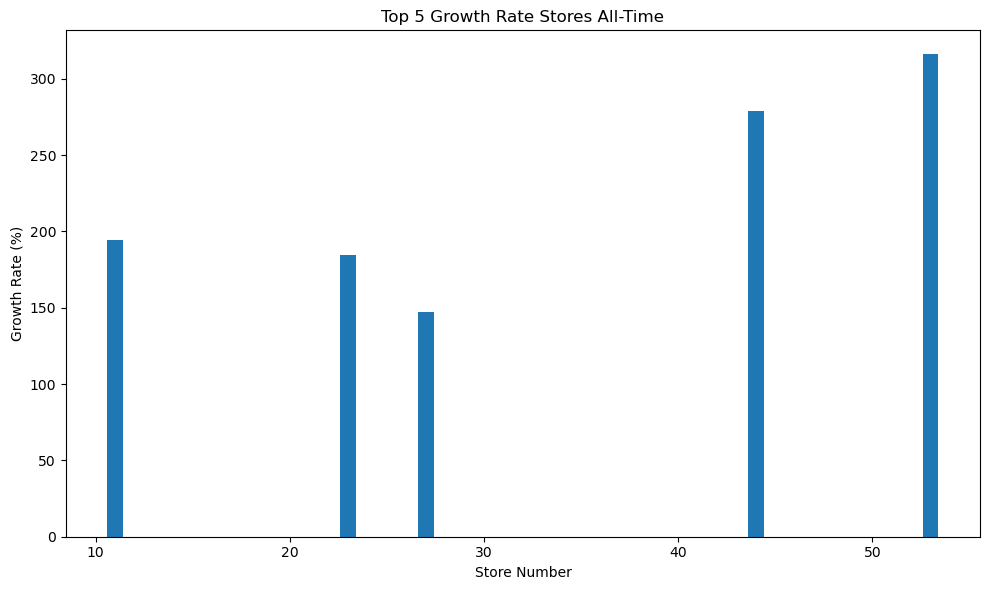

In [5]:
# Plot the top 5 growth rate stores
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth_stores['store_nbr'], top_5_growth_stores['growth_rate'])
plt.xlabel('Store Number')
plt.ylabel('Growth Rate (%)')
plt.title('Top 5 Growth Rate Stores All-Time')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
# Calculate total sales for each store
store_total_sales = train_df.groupby('store_nbr')['sales'].sum().reset_index()

# Merge store_total_sales with stores_data to get store information
store_info = pd.merge(store_total_sales, store_df, on='store_nbr')

# Calculate growth rate for each city
city_growth_rates = store_info.groupby('city')['sales'].pct_change() * 100

# Get the average growth rate for each city (since some cities may have multiple stores)
city_growth_rates_avg = city_growth_rates.groupby(store_info['city']).mean()

# Sort cities based on growth rate in descending order
top_5_growth_cities = city_growth_rates_avg.sort_values(ascending=False).head(5)

# Print the top 5 growth rate cities
print("Top 5 Growth Rate Cities All-Time:")
for city, growth_rate in top_5_growth_cities.items():
    print(f"City: {city}, Growth Rate: {growth_rate:.2f}%")

Top 5 Growth Rate Cities All-Time:
City: Manta, Growth Rate: 316.00%
City: Ambato, Growth Rate: 145.92%
City: Guayaquil, Growth Rate: 36.98%
City: Quito, Growth Rate: 30.42%
City: Latacunga, Growth Rate: -1.28%


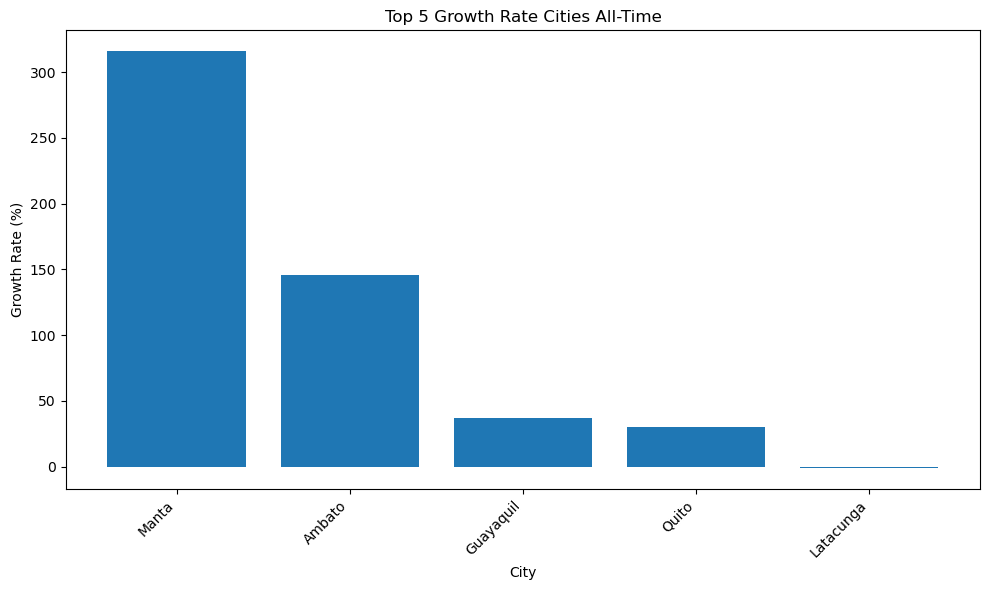

In [7]:
# Plot the top 5 growth rate cities
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth_cities.index, top_5_growth_cities.values)
plt.xlabel('City')
plt.ylabel('Growth Rate (%)')
plt.title('Top 5 Growth Rate Cities All-Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Calculate total sales for each product family
family_total_sales = train_df.groupby('family')['sales'].sum().reset_index()

# Calculate growth rate for each product family
family_total_sales['growth_rate'] = family_total_sales['sales'].pct_change() * 100

# Sort families based on growth rate in descending order
top_5_growth_families = family_total_sales.sort_values(by='growth_rate', ascending=False).head(5)

# Print the top 5 growth rate families
print("Top 5 Growth Rate Product Families All-Time:")
for index, row in top_5_growth_families.iterrows():
    family_name = row['family']
    growth_rate = row['growth_rate']
    print(f"Product Family: {family_name}, Growth Rate: {growth_rate:.2f}%")

Top 5 Growth Rate Product Families All-Time:
Product Family: BREAD/BAKERY, Growth Rate: 654357.06%
Product Family: BEVERAGES, Growth Rate: 64108.04%
Product Family: HOME CARE, Growth Rate: 38415.29%
Product Family: CLEANING, Growth Rate: 12711.91%
Product Family: MEATS, Growth Rate: 11570.89%


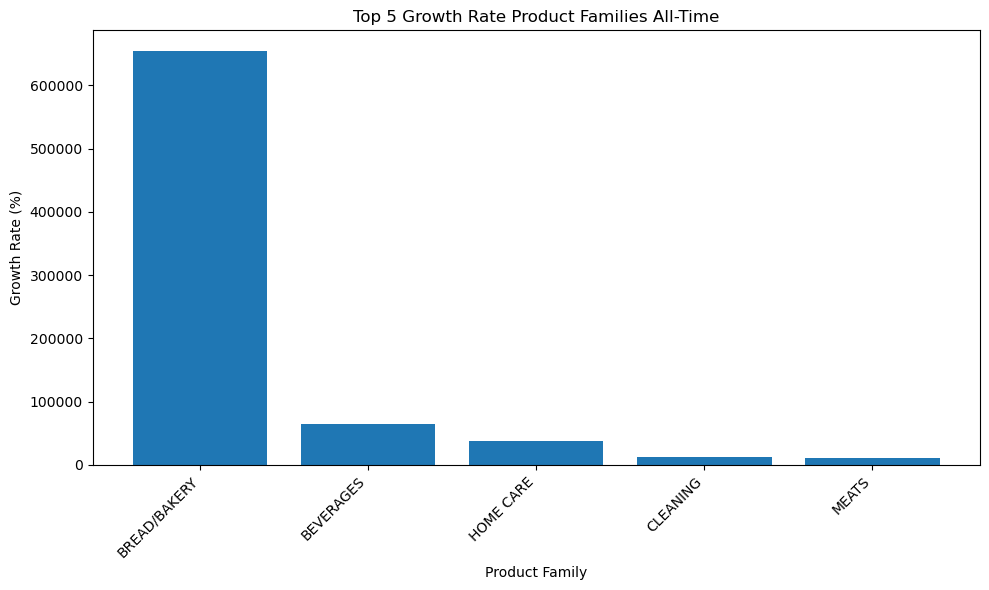

In [9]:
# Plot the top 5 growth rate families
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth_families['family'], top_5_growth_families['growth_rate'])
plt.xlabel('Product Family')
plt.ylabel('Growth Rate (%)')
plt.title('Top 5 Growth Rate Product Families All-Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:

# Calculate the total sales for each store
store_sales = train_df.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)
#store_sales = data.groupby('store_nbr')['sales'].sum()


# Get the top 5 stores with the highest total sales
top_10_stores = store_sales.head(10)

# Calculate the total sales for each city
city_sales = merged_data.groupby('city')['sales'].sum().sort_values(ascending=False)


# Get the top 5 cities with the highest total sales
top_10_cities = city_sales.head(10)

# Calculate the total sales for each product family
family_sales = train_df.groupby('family')['sales'].sum()

# Sort the product families based on sales in descending order
sorted_family_sales = family_sales.sort_values(ascending=False)

# Get the top 10 families with the most sales
top_10_families = sorted_family_sales.head(10)



# Print the results
print("Top 10 stores by total sales:")
print(top_10_stores)
print("\nTop 10 cities by total sales:")
print(top_10_cities)
print("\nTop 10 product lines by total sales:")
print(top_10_families)

Top 10 stores by total sales:
store_nbr
44    6.208755e+07
45    5.449801e+07
47    5.094831e+07
3     5.048191e+07
49    4.342010e+07
46    4.189606e+07
48    3.593313e+07
51    3.291149e+07
8     3.049429e+07
50    2.865302e+07
Name: sales, dtype: float64

Top 10 cities by total sales:
city
Quito            5.567418e+08
Guayaquil        1.229673e+08
Cuenca           4.916860e+07
Ambato           4.030440e+07
Santo Domingo    3.583432e+07
Machala          3.338680e+07
Cayambe          2.832556e+07
Latacunga        2.118226e+07
Daule            1.918802e+07
Loja             1.886000e+07
Name: sales, dtype: float64

Top 10 product lines by total sales:
family
GROCERY I        3.434627e+08
BEVERAGES        2.169545e+08
PRODUCE          1.227047e+08
CLEANING         9.752129e+07
DAIRY            6.448771e+07
BREAD/BAKERY     4.213395e+07
POULTRY          3.187600e+07
MEATS            3.108647e+07
PERSONAL CARE    2.459205e+07
DELI             2.411032e+07
Name: sales, dtype: float64


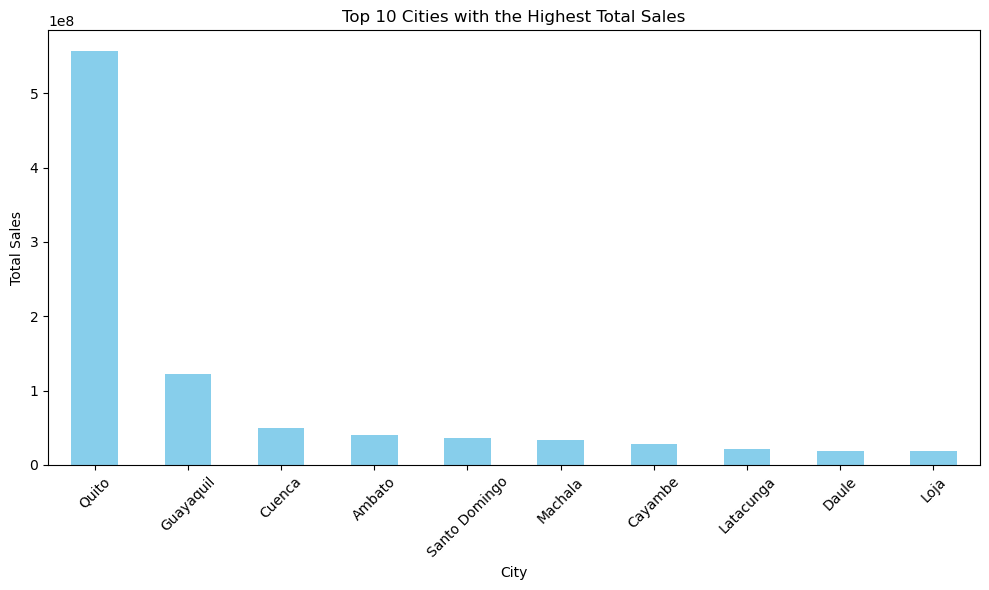

In [11]:
# Chart for cities with the highest total sales
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

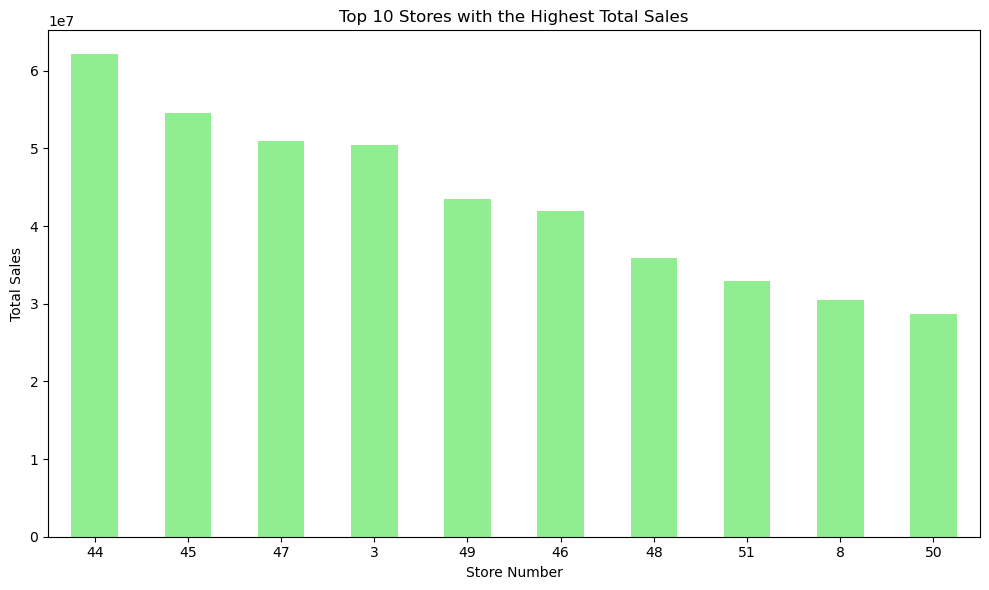

In [12]:
# Chart for stores with the highest total sales
plt.figure(figsize=(10, 6))
top_10_stores.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Stores with the Highest Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

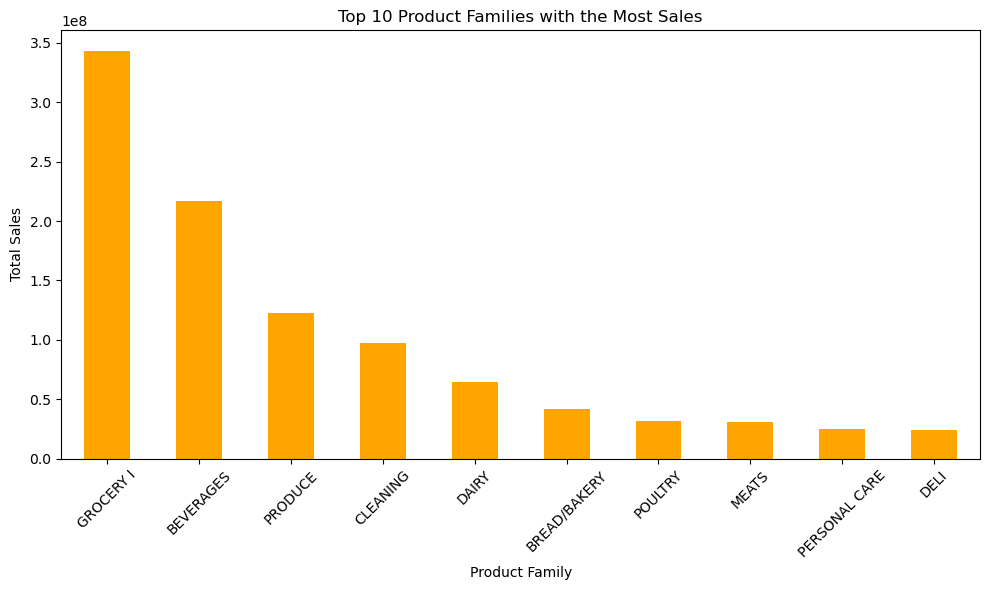

In [13]:
# Chart for families with the most sales
plt.figure(figsize=(10, 6))
top_10_families.plot(kind='bar', color='orange')
plt.title('Top 10 Product Families with the Most Sales')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Convert the date column to datetime format
train_df['date'] = pd.to_datetime(train_df['date'])

# Extract the year and month from the date column
train_df['year_month'] = train_df['date'].dt.to_period('M')

# Filter the data for the first three months of 2016 and 2017
data_2016 = train_df[train_df['year_month'].between('2016-01', '2016-03')]
data_2017 = train_df[train_df['year_month'].between('2017-01', '2017-03')]

# Calculate the total sales for each store in the first three months of 2016 and 2017
sales_2016 = data_2016.groupby('store_nbr')['sales'].sum()
sales_2017 = data_2017.groupby('store_nbr')['sales'].sum()

# Calculate the growth rate for each store
growth_rate = (sales_2017 - sales_2016) / sales_2016

# Sort the stores based on growth rate in descending order
most_growth_rate = growth_rate.sort_values(ascending=False)
least_growth_rate = growth_rate.sort_values(ascending=True)

# Get the top 5 stores with the highest growth rate
top_10_stores = most_growth_rate.head(10)
bot_10_stores = least_growth_rate.head(10)

# Merge the sales data with the stores data based on store_nbr
merged_data = pd.merge(sales_2016, sales_2017, left_index=True, right_index=True)
merged_data = pd.merge(merged_data, store_df, left_index=True, right_on='store_nbr')

# Calculate the growth rate for each city
merged_data['growth_rate'] = (merged_data['sales_y'] - merged_data['sales_x']) / merged_data['sales_x']

# Group the data by city and calculate the average growth rate
city_growth_rate = merged_data.groupby('city')['growth_rate'].mean()

# Sort the cities based on growth rate in descending order
max_growth_rate = city_growth_rate.sort_values(ascending=False)
min_growth_rate = city_growth_rate.sort_values(ascending=True)

# Get the top 5 cities with the highest growth rate
top_10_cities = max_growth_rate.head(10)
bot_10_cities = min_growth_rate.head(10)



# Display the top 5 stores with the highest growth rate
print(top_10_stores)
print(bot_10_stores)
print(top_10_cities)
print(bot_10_cities)

store_nbr
53    0.509542
43    0.321299
42    0.230761
26    0.226196
41    0.225012
22    0.216018
29    0.185927
32    0.185286
21    0.183100
17    0.170502
Name: sales, dtype: float64
store_nbr
13   -0.049202
16   -0.046178
19   -0.026257
33   -0.009664
10    0.009099
35    0.009744
36    0.022058
12    0.025006
31    0.025782
25    0.026104
Name: sales, dtype: float64
city
Manta         0.509542
Esmeraldas    0.321299
Puyo          0.216018
Machala       0.177596
Daule         0.156919
Cuenca        0.138374
Guayaquil     0.118147
Ambato        0.116318
El Carmen     0.101010
Quito         0.099386
Name: growth_rate, dtype: float64
city
Guaranda        -0.026257
Latacunga       -0.012098
Quevedo         -0.009664
Playas           0.009744
Libertad         0.022058
Babahoyo         0.025782
Salinas          0.026104
Riobamba         0.042592
Ibarra           0.058376
Santo Domingo    0.059688
Name: growth_rate, dtype: float64


In [15]:
# Convert the date column to datetime format
train_df['date'] = pd.to_datetime(train_df['date'])

# Extract the year and month from the date column
train_df['year_month'] = train_df['date'].dt.to_period('M')

# Filter the data for the first three months of 2016 and 2017
data_2016 = train_df[train_df['year_month'].between('2016-01', '2016-03')]
data_2017 = train_df[train_df['year_month'].between('2017-01', '2017-03')]

# Calculate the total sales for each store in the first three months of 2016 and 2017
sales_2016 = data_2016.groupby('family')['sales'].sum()
sales_2017 = data_2017.groupby('family')['sales'].sum()

# Merge the sales data for 2016 and 2017 based on product family
merged_data_product = pd.merge(sales_2016, sales_2017, left_index=True, right_index=True)

# Calculate the growth rate for each product family
merged_data_product['growth rate'] = (merged_data_product['sales_y'] - merged_data_product['sales_x']) / merged_data_product['sales_x']

# Replace infinite growth rates with a specific value (e.g., 0)
merged_data_product['growth rate'] = merged_data_product['growth rate'].replace([np.inf, -np.inf], 0)

# Sort the product families based on growth rate in descending order
max_growth_rate = merged_data_product['growth rate'].sort_values(ascending=False)
min_growth_rate = merged_data_product['growth rate'].sort_values(ascending=True)

# Get the top 10 product families with the highest growth rate
top_10_families = max_growth_rate.head(10)
bot_10_families = min_growth_rate.head(10)


# Display the top 5 stores with the highest growth rate
print(top_10_families)
print(bot_10_families)

family
LAWN AND GARDEN               2.291861
HOME AND KITCHEN I            0.490830
SCHOOL AND OFFICE SUPPLIES    0.412318
PET SUPPLIES                  0.377493
PLAYERS AND ELECTRONICS       0.326022
LINGERIE                      0.303544
BEAUTY                        0.219899
BABY CARE                     0.170794
HOME APPLIANCES               0.162829
BEVERAGES                     0.157666
Name: growth rate, dtype: float64
family
FROZEN FOODS          -0.049790
CELEBRATION           -0.037730
HOME AND KITCHEN II   -0.021991
SEAFOOD               -0.020309
AUTOMOTIVE            -0.013696
LIQUOR,WINE,BEER      -0.008398
BOOKS                  0.000000
POULTRY                0.016179
PRODUCE                0.025751
GROCERY II             0.025884
Name: growth rate, dtype: float64


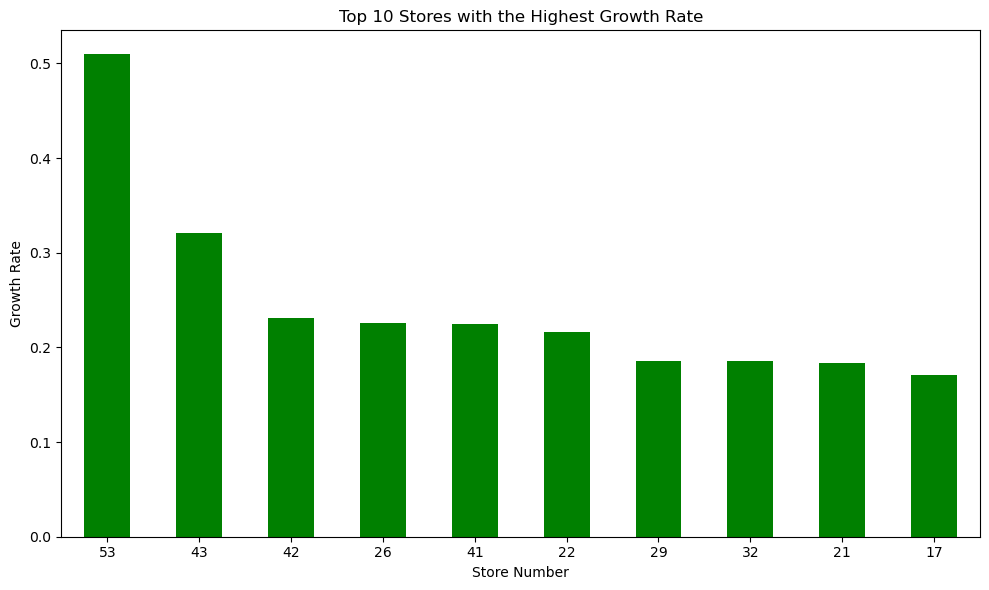

In [16]:
# Create a bar chart for the top 5 stores with the highest growth rate
plt.figure(figsize=(10, 6))
top_10_stores.plot(kind='bar', color='green')
plt.title('Top 10 Stores with the Highest Growth Rate')
plt.xlabel('Store Number')
plt.ylabel('Growth Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

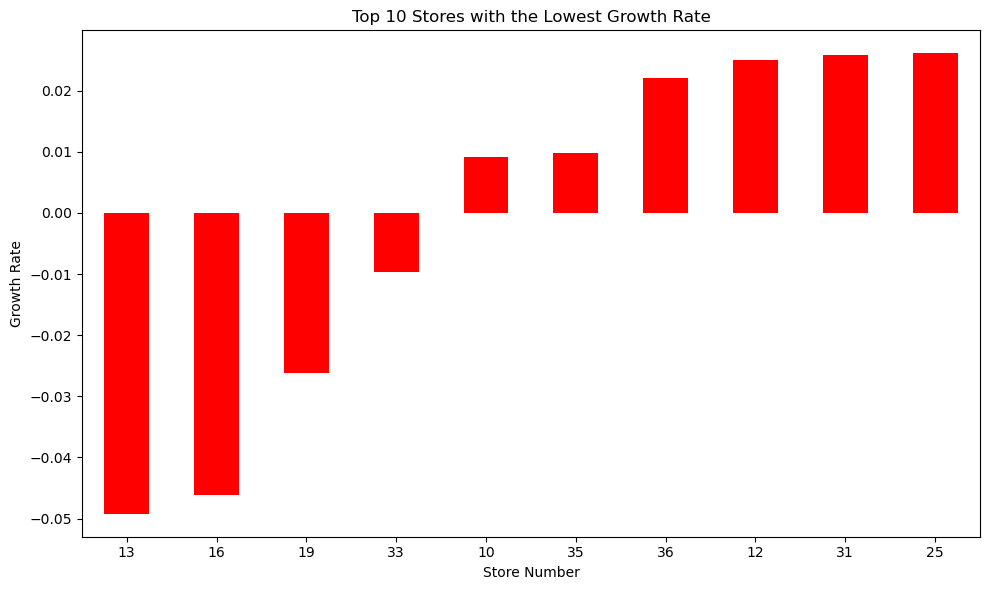

In [17]:
# Create a bar chart for the top 5 stores with the lowest growth rate
plt.figure(figsize=(10, 6))
bot_10_stores.plot(kind='bar', color='red')
plt.title('Top 10 Stores with the Lowest Growth Rate')
plt.xlabel('Store Number')
plt.ylabel('Growth Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

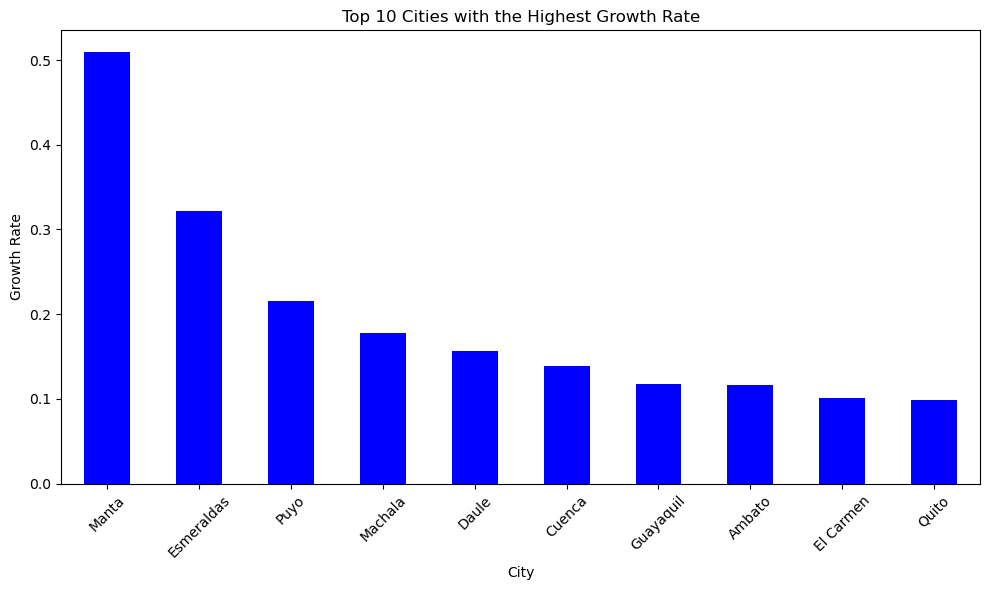

In [18]:
# Create a bar chart for the top 5 cities with the highest growth rate
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='blue')
plt.title('Top 10 Cities with the Highest Growth Rate')
plt.xlabel('City')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


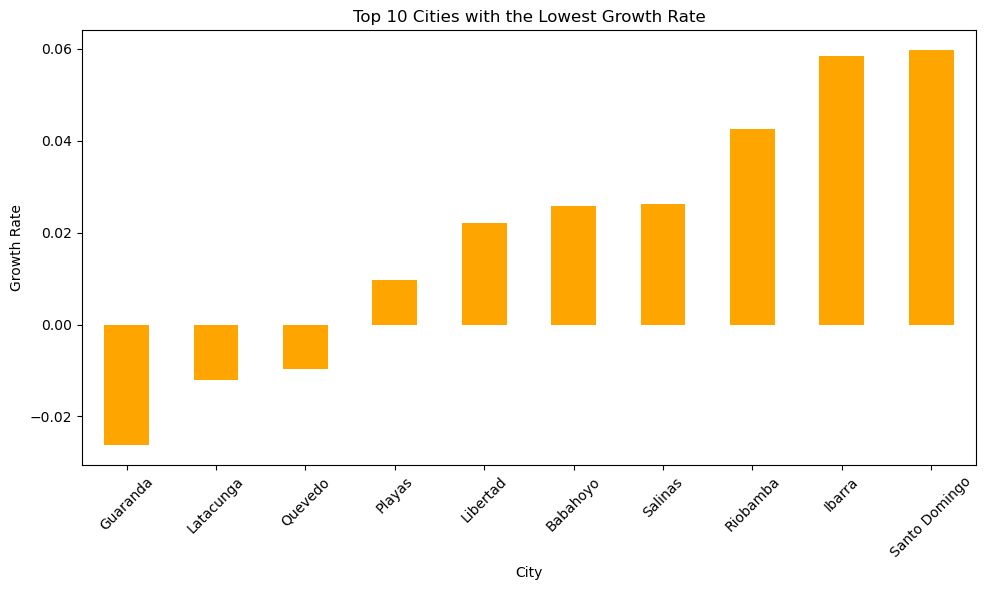

In [19]:
# Create a bar chart for the top 5 cities with the lowest growth rate
plt.figure(figsize=(10, 6))
bot_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities with the Lowest Growth Rate')
plt.xlabel('City')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

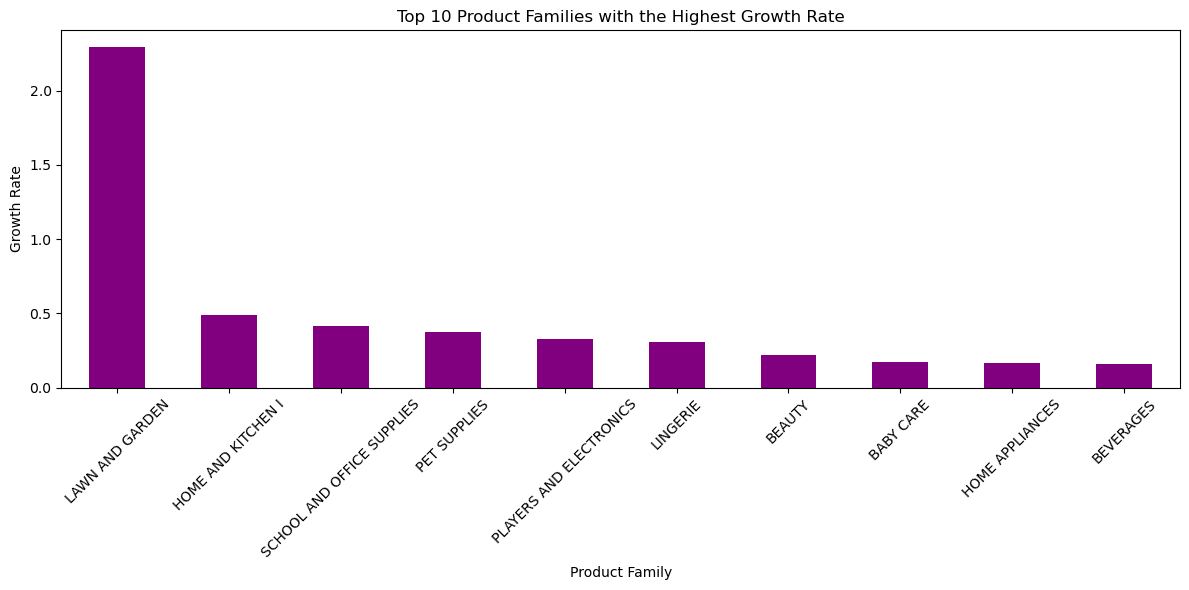

In [20]:
# Create a bar chart for the top 10 product families with the highest growth rate
plt.figure(figsize=(12, 6))
top_10_families.plot(kind='bar', color='purple')
plt.title('Top 10 Product Families with the Highest Growth Rate')
plt.xlabel('Product Family')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

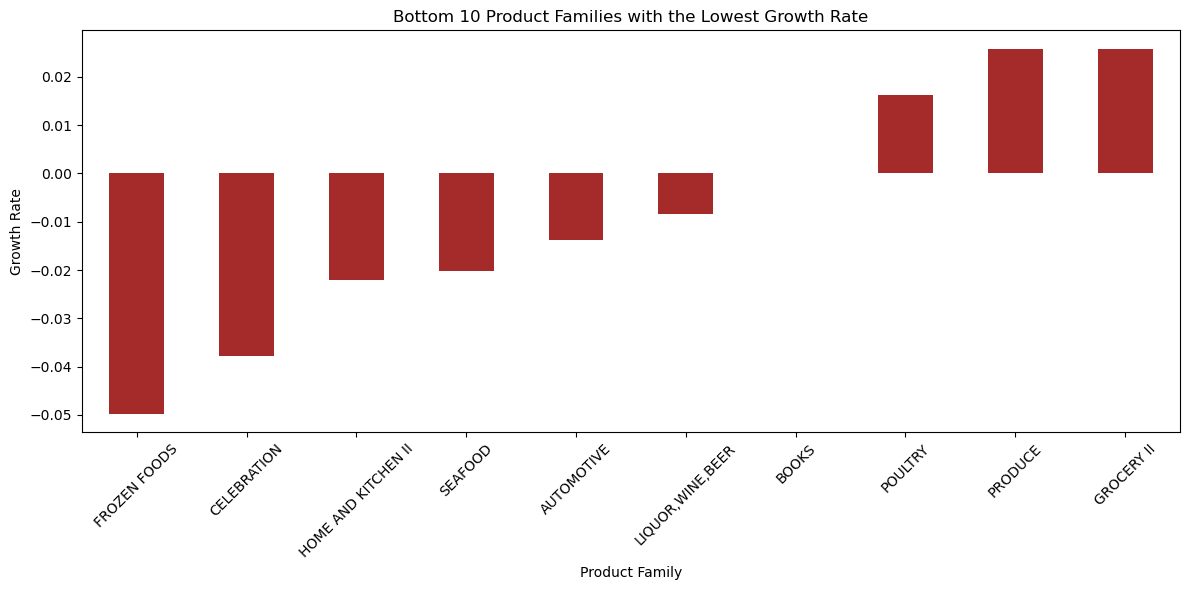

In [21]:
# Create a bar chart for the bottom 10 product families with the lowest growth rate
plt.figure(figsize=(12, 6))
bot_10_families.plot(kind='bar', color='brown')
plt.title('Bottom 10 Product Families with the Lowest Growth Rate')
plt.xlabel('Product Family')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Convert the date columns to datetime format
train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Extract the year and month from the date columns
train_df['year_month'] = train_df['date'].dt.to_period('M')
oil_df['year_month'] = oil_df['date'].dt.to_period('M')

# Merge the oil prices with the sales data based on the year and month
merged_data = pd.merge(train_df, oil_df, on='year_month')
# Calculate the correlation between oil prices and sales
correlation = merged_data['sales'].corr(merged_data['dcoilwtico'])

# Display the correlation coefficient
print("Correlation between Oil Prices and Sales: ", correlation)

Correlation between Oil Prices and Sales:  -0.07495842888642766


In [23]:
# Calculate the correlation between oil prices and sales for each product family
family_correlations = merged_data.groupby('family')['sales', 'dcoilwtico'].corr().unstack()['sales']['dcoilwtico']

# Sort the correlations in descending order
sorted_correlations = family_correlations.sort_values(ascending=False)

# Get the product family with the highest correlation
most_affected_family = sorted_correlations.idxmax()
top = sorted_correlations.head(5)
# Display the most affected family
print("Most Affected Product Family: ", top)

/tmp/ipykernel_20/3131415200.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  family_correlations = merged_data.groupby('family')['sales', 'dcoilwtico'].corr().unstack()['sales']['dcoilwtico']


Most Affected Product Family:  family
LINGERIE           0.083576
HOME APPLIANCES    0.026211
MEATS             -0.026203
SEAFOOD           -0.043230
GROCERY II        -0.058283
Name: dcoilwtico, dtype: float64
